In [1]:
# for manipulation of dataframe
import pandas as pd
# for creating arrays
import numpy as np
# for creating data visualization
import matplotlib.pyplot as plt
# for creating distributions 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# let's load the dataset
df=pd.read_excel('crop_prediction.xlsx')

In [3]:
# let's check the first five rows of the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43,21,82.0,7,203,rice
1,85.0,58,41,22,80.0,7,227,rice
2,60.0,55,44,23,82.0,8,264,rice
3,74.0,35,40,26,80.0,7,243,rice
4,78.0,42,42,20,82.0,8,263,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2186 non-null   float64
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   int64  
 4   humidity     2179 non-null   float64
 5   ph           2200 non-null   int64  
 6   rainfall     2200 non-null   int64  
 7   label        2200 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 137.6+ KB


In [5]:
# let's check the shape of the dataset
df.shape

(2200, 8)

<AxesSubplot:>

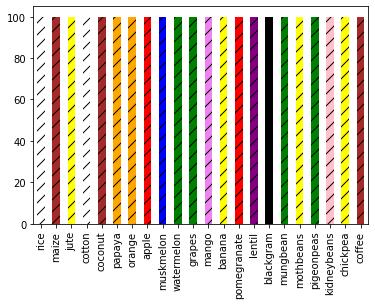

In [6]:
# let's check the name of the crops
cols=['white','brown','yellow','white','brown','orange','orange',
'red','blue','green','green','violet','yellow','red','purple',
'black','green','yellow','green','pink','yellow','brown']
df['label'].value_counts().plot.bar(linewidth=1,alpha=1,fill=True,color=cols,hatch='//')

# Data Cleaning

In [7]:
# let's check if there is any missing value present in the dataset
df.isnull().sum()

N              14
P               0
K               0
temperature     0
humidity       21
ph              0
rainfall        0
label           0
dtype: int64

In [8]:
# filling the missing value for Nitrogen column with 0
df['N'].fillna(0,inplace=True)

In [9]:
# filling the missing value for Humidity column with mean value of Humidity column
df['humidity'].fillna(df['humidity'].mean(),inplace=True)

In [10]:
# let's recheck if there is still any missing value present in the dataset
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Exploratory Data Analysis

In [11]:
# Let's do the descriptive statistics of the dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.286364,53.362727,48.149091,25.613182,71.670491,6.495000,103.458182
std,37.037324,32.985883,50.647931,5.080069,22.010161,0.786408,54.964423
min,0.000000,5.000000,5.000000,9.000000,14.000000,4.000000,20.000000
25%,21.000000,28.000000,20.000000,23.000000,60.000000,6.000000,65.000000
50%,37.000000,51.000000,32.000000,26.000000,80.000000,6.000000,95.000000
75%,84.000000,68.000000,49.000000,29.000000,90.000000,7.000000,124.000000
max,140.000000,145.000000,205.000000,44.000000,100.000000,10.000000,299.000000


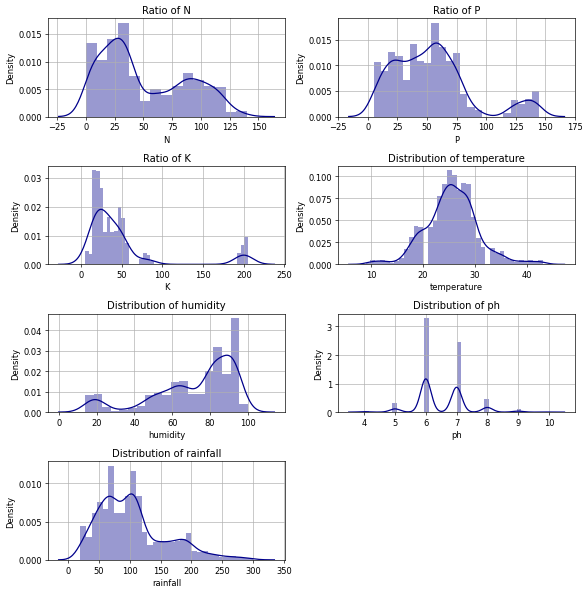

In [12]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 60

features = ['N','P','K','temperature','humidity','ph','rainfall']

for i, feat in enumerate(features):
    plt.subplot(4,2,i + 1)
    sns.distplot(df[feat],color='darkblue')
    if i < 3:
        plt.title(f'Ratio of {feat}',fontsize = 12)
    else:
        plt.title(f'Distribution of {feat}',fontsize = 12)
    plt.tight_layout()
    plt.grid()
    

<AxesSubplot:>

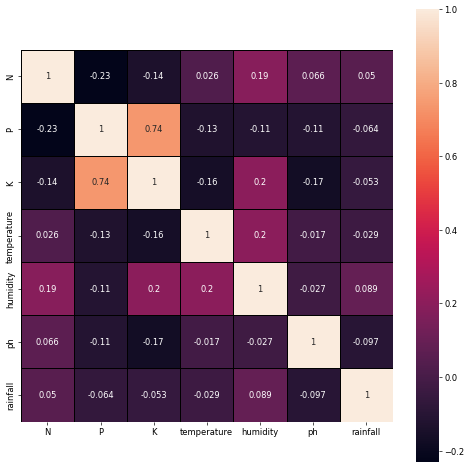

In [13]:
# Let's check the correlation between the variables
sns.heatmap(df.corr(),annot=True,cbar=True,linewidth=1,linecolor='black',square=True)

In [14]:
# let's check the Avearge requirement of all the crops

print ("Average Ratio of Nitrogen in the Soil:{0:.2f}".format(df['N'].mean()))
print ("Average Ratio of Phosphorous in the Soil:{0:.2f}".format(df['P'].mean()))
print ("Average Ratio of Potassium in the Soil:{0:.2f}".format(df['K'].mean()))
print ("Average Temperature in the Soil:{0:.2f}".format(df['temperature'].mean()))
print ("Average Relative Humidity in % in the Soil:{0:.2f}".format(df['humidity'].mean()))
print ("Average PH value of the Soil:{0:.2f}".format(df['ph'].mean()))
print ("Average Rainfall in mm:{0:.2f}".format(df['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil:50.29
Average Ratio of Phosphorous in the Soil:53.36
Average Ratio of Potassium in the Soil:48.15
Average Temperature in the Soil:25.61
Average Relative Humidity in % in the Soil:71.67
Average PH value of the Soil:6.50
Average Rainfall in mm:103.46


In [15]:
# Let's chech the Crop Summary I
df.groupby(['label'])[['N','P','K']].agg(['min','mean','max'])

N                   P                 K             
               min    mean    max  min    mean  max  min    mean  max
label                                                                
apple          0.0   20.80   40.0  120  134.22  145  195  199.89  205
banana        80.0  100.23  120.0   70   82.01   95   45   50.05   55
blackgram     20.0   40.02   60.0   55   67.47   80   15   19.24   25
chickpea      20.0   40.09   60.0   55   67.79   80   75   79.92   85
coconut        0.0   21.98   40.0    5   16.93   30   25   30.59   35
coffee        80.0  101.20  120.0   15   28.74   40   25   29.94   35
cotton       100.0  117.77  140.0   35   46.24   60   15   19.56   25
grapes         0.0   23.18   40.0  120  132.53  145  195  200.11  205
jute          60.0   78.40  100.0   35   46.86   60   35   39.99   45
kidneybeans    0.0   20.63   40.0   55   67.54   80   15   20.05   25
lentil         0.0   18.77   40.0   55   68.36   80   15   19.41   25
maize          0.0   76.09   99.0   35   48.44   60   15   19.79   25
mango          0.0   20.07   40.0   15   27.18   40   25   29.92   35
mothbeans      0.0   21.44   40.0   35   48.01   60   15   20.23   25
mungbean       0.0   20.99   40.0   35   47.28   60   15   19.87   25
muskmelon     80.0  100.32  120.0    5   17.72   30   45   50.08   55
orange         0.0   19.58   40.0    5   16.55   30    5   10.01   15
papaya        31.0   49.88   70.0   46   59.05   70   45   50.04   55
pigeonpeas     0.0   19.12   40.0   55   67.73   80   15   20.29   25
pomegranate    0.0   18.87   40.0    5   18.75   30   35   40.21   45
rice           0.0   77.45   99.0   35   47.58   60   35   39.87   45
watermelon    80.0   99.42  120.0    5   17.00   30   45   50.22   55

In [16]:
# Let's chech the Crop Summary II
df.groupby(['label'])[['humidity','ph','rainfall','temperature']].agg(['min','mean','max'])

humidity                         ph           rainfall          \
                   min       mean         max min  mean max      min    mean   
label                                                                          
apple        90.000000  92.360000   95.000000   6  6.00   6      100  112.71   
banana       75.000000  80.330000   85.000000   6  6.00   6       90  104.57   
blackgram    60.000000  65.150000   70.000000   7  7.20   8       60   67.84   
chickpea     14.000000  20.676934   71.670491   6  7.33   9       65   80.14   
coconut      90.000000  94.840000  100.000000   6  6.00   6      131  175.72   
coffee       50.000000  58.850000   70.000000   6  6.73   7      115  158.06   
cotton       75.000000  79.880000   85.000000   6  6.88   8       61   80.42   
grapes       80.000000  81.930000   84.000000   6  6.00   6       65   69.60   
jute         71.000000  79.620000   90.000000   6  6.65   7      150  174.76   
kidneybeans  18.000000  22.076705   71.670491   6  6.00   6       60  105.90   
lentil       60.000000  64.780000   70.000000   6  6.93   8       35   45.64   
maize        55.000000  65.360115   75.000000   6  6.32   7       61   84.77   
mango        45.000000  50.160000   55.000000   5  5.75   7       89   94.69   
mothbeans    40.000000  53.190000   65.000000   4  6.86  10       31   51.21   
mungbean     80.000000  85.500000   90.000000   6  6.72   7       36   48.39   
muskmelon    90.000000  92.370000   95.000000   6  6.29   7       20   24.66   
orange       90.000000  92.170000   95.000000   6  7.00   8      100  110.44   
papaya       90.000000  92.410000   95.000000   7  7.00   7       40  142.63   
pigeonpeas   30.000000  48.413410   71.670491   5  5.84   7       90  149.46   
pomegranate  85.000000  90.100000   95.000000   6  6.48   7      103  107.52   
rice         71.670491  81.433639   85.000000   5  6.43   8      183  236.19   
watermelon   80.000000  85.150000   90.000000   6  6.48   7       40   50.76   

                 temperature             
             max         min   mean max  
label                                    
apple        125          21  22.61  24  
banana       120          25  27.33  30  
blackgram     75          25  29.96  35  
chickpea      95          17  18.81  21  
coconut      226          25  27.45  30  
coffee       199          23  25.56  28  
cotton       100          22  23.99  26  
grapes        75           9  23.85  42  
jute         200          23  24.92  27  
kidneybeans  150          15  20.14  25  
lentil        55          18  24.49  30  
maize        110          18  22.42  27  
mango        101          27  31.20  36  
mothbeans     74          24  28.17  32  
mungbean      60          27  28.54  30  
muskmelon     30          27  28.70  30  
orange       120          10  22.77  35  
papaya       249          23  33.71  44  
pigeonpeas   199          18  27.74  37  
pomegranate  112          18  21.86  25  
rice         299          20  23.70  27  
watermelon    60          24  25.57  27

# Defining the Independent and the Dependent Variable

In [17]:
# Let's define the features and target variable
x=df[['N','P','K','temperature','humidity','ph','rainfall']]
y=df[['label']]

# Dropping the Label Column from the Dataset so that the model does not cheat

In [18]:
# Let's drop the categorical column(label)
df.drop(['label'],axis=1,inplace=True)

# Dataset Splitting

In [19]:
# Let's split our dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
# The Training Dataset on which the model is trained
pd.set_option('display.max_rows',1760)
X_train.reset_index(drop=True)

,N,P,K,temperature,humidity,ph,rainfall
0,27.0,120,200,21,91.000000,6,117
1,81.0,36,38,24,88.000000,6,150
2,90.0,59,35,24,90.000000,7,175
3,81.0,16,45,27,86.000000,7,60
4,47.0,80,77,17,16.000000,8,73
5,105.0,74,45,25,81.000000,6,119
6,14.0,8,43,22,94.000000,7,112
7,88.0,78,45,29,79.000000,6,92
8,28.0,58,24,20,18.000000,6,144
9,25.0,130,197,40,83.000000,6,75


In [21]:
# The Training Dataset on which the model is trained
pd.set_option('display.max_rows',1760)
y_train.reset_index(drop=True)

,label
0,apple
1,jute
2,jute
3,watermelon
4,chickpea
5,banana
6,pomegranate
7,banana
8,kidneybeans
9,grapes


In [22]:
# The Testing Dataset on which the model will be evaluated
pd.set_option('display.max_rows',440)
X_test.reset_index(drop=True)

,N,P,K,temperature,humidity,ph,rainfall
0,105.0,14,50,26,88.000000,6,60
1,91.0,12,46,25,85.000000,6,48
2,14.0,121,203,10,84.000000,6,74
3,52.0,73,79,17,19.000000,8,94
4,32.0,66,17,35,65.000000,7,70
5,61.0,52,41,25,84.000000,7,205
6,11.0,41,19,27,42.000000,5,44
7,22.0,60,24,19,20.000000,6,104
8,106.0,20,51,30,91.000000,6,20
9,93.0,83,46,29,84.000000,6,109


In [23]:
# The Testing Dataset on which the model will be evaluated
pd.set_option('display.max_rows',440)
y_test.reset_index(drop=True)

,label
0,watermelon
1,watermelon
2,grapes
3,chickpea
4,blackgram
5,rice
6,mothbeans
7,kidneybeans
8,muskmelon
9,banana


# Training the Model

In [24]:
# Importing Random Forest algorithm from sklearn
from sklearn.ensemble import RandomForestClassifier
# Let's train our model
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
pd.set_option('display.max_rows',440)
X_test.reset_index(drop=True)

,N,P,K,temperature,humidity,ph,rainfall
0,105.0,14,50,26,88.000000,6,60
1,91.0,12,46,25,85.000000,6,48
2,14.0,121,203,10,84.000000,6,74
3,52.0,73,79,17,19.000000,8,94
4,32.0,66,17,35,65.000000,7,70
5,61.0,52,41,25,84.000000,7,205
6,11.0,41,19,27,42.000000,5,44
7,22.0,60,24,19,20.000000,6,104
8,106.0,20,51,30,91.000000,6,20
9,93.0,83,46,29,84.000000,6,109


In [26]:
# Predicting the model with testing dataset(X_test)
y_predicted=pd.DataFrame(model.predict(X_test))
y_predicted.reset_index(drop=True)

,0
0,watermelon
1,watermelon
2,grapes
3,chickpea
4,blackgram
5,rice
6,mothbeans
7,kidneybeans
8,muskmelon
9,banana


# Model Testing

In [27]:
# Let's test our model with some random values
model_prediction=model.predict((np.array([[105,14,50,25,88,6,60]])))
print('The most Suggested Crop for the Given Climatic Condition is :', model_prediction)

The most Suggested Crop for the Given Climatic Condition is : ['watermelon']


# Model Evaluation

In [28]:
# Lets's calculate the score of our model
model.score(X_test,y_test)*100

99.31818181818181

Text(0.5, 1.0, 'Confusion_Matrix')

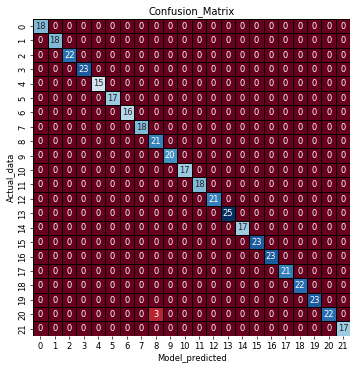

In [29]:
# for creating confusion matrix
from sklearn.metrics import confusion_matrix
# Let's check where our Model fails 
plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,cbar=False,linewidth=1,linecolor='black',cmap='RdBu',square=True)
plt.xlabel('Model_predicted')
plt.ylabel('Actual_data')
plt.title('Confusion_Matrix')

In [30]:
# for creating classification report
from sklearn.metrics import classification_report
# Let's print our classification report
cr=classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    